# Predicting Stock Prices Using Regression on Moving Averages

In [ ]:
# import necessary libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
warnings.filterwarnings('ignore')

## Simple Moving Average (SMA) - Meta

In [ ]:
# import the closing price data of META stock for the period of 2 years -

meta_df = pd.read_csv('META.csv')
meta_df.head()


In [ ]:
# Create 20 days simple moving average column

# convert Date column to datetime
meta_df['Date'] = pd.to_datetime(meta_df['Date'], format = '%Y-%m-%d')
# sort by datetime
meta_df.sort_values(by='Date', inplace=True, ascending=True)

# Create 50 days simple moving average column
meta_df['50_SMA'] = meta_df['Close'].rolling(window = 50, min_periods = 1).mean()
meta_df.dropna()
meta_df.head()

In [ ]:
# visualize data

# Calculate the number of quarters in the data range
num_quarters = (meta_df['Date'].dt.year.max() - meta_df['Date'].dt.year.min() + 1) * 4

meta_df['Adj Close'].plot(figsize = (15, 8), fontsize = 12)
plt.grid()
plt.ylabel('Price in Dollars')
plt.xlabel('Year')
plt.title('Meta')

# Customize x-axis ticks
plt.xticks(np.linspace(0, len(meta_df) - 1, num=num_quarters), [f'Q{q} {y}' for y in range(meta_df['Date'].dt.year.min(), meta_df['Date'].dt.year.max() + 1) for q in range(1, 5)])
# this might actually be wrong I just realised because our data starts from april

plt.show()

In [ ]:
# # train test split
# test_size = 0.2
# training_size = 1 - test_size

# test_num = int(test_size * len(meta_df))
# train_num = int(training_size * len(meta_df))

# train = meta_df[:train_num][['Date', 'Adj Close', '50_SMA']]
# test = meta_df[train_num:][['Date', 'Adj Close', '50_SMA']]

# test.head()

# lr = LinearRegression()
# lr.fit(train[['Adj Close']], train['50_SMA'])
# y_pred = lr.predict(test[['Date', 'Adj Close']])

Model Coefficients: [[1.06666437]]
Mean Absolute Error: 28.58717997827785
Coefficient of Determination: 0.7102370325097322
Mean Absolute Percentage Error (MAPE): 6.321424338849449


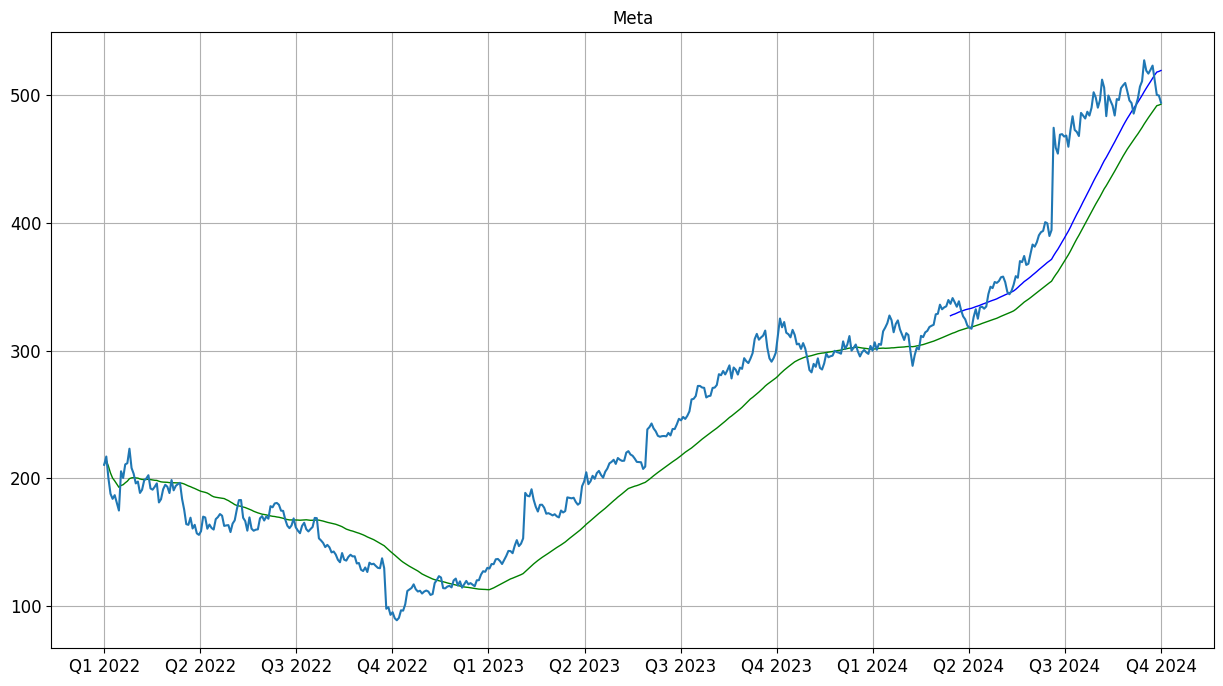

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(meta_df[['50_SMA']], meta_df[['Adj Close']], test_size=.2, shuffle=False)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Model Coefficients:", lr.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error (MAPE):", np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

plt.figure(figsize = (20, 10))
meta_df['50_SMA'].plot(color = 'g', lw = 1)
plt.plot(y_test.index, y_pred, color = 'b', lw = 1)
meta_df['Adj Close'].plot(figsize = (15, 8), fontsize = 12)
plt.title('Meta')

# Customize x-axis ticks
plt.xticks(np.linspace(0, len(meta_df) - 1, num=num_quarters), [f'Q{q} {y}' for y in range(meta_df['Date'].dt.year.min(), meta_df['Date'].dt.year.max() + 1) for q in range(1, 5)])
# this might actually be wrong I just realised because our data starts from april

plt.grid()
plt.show()

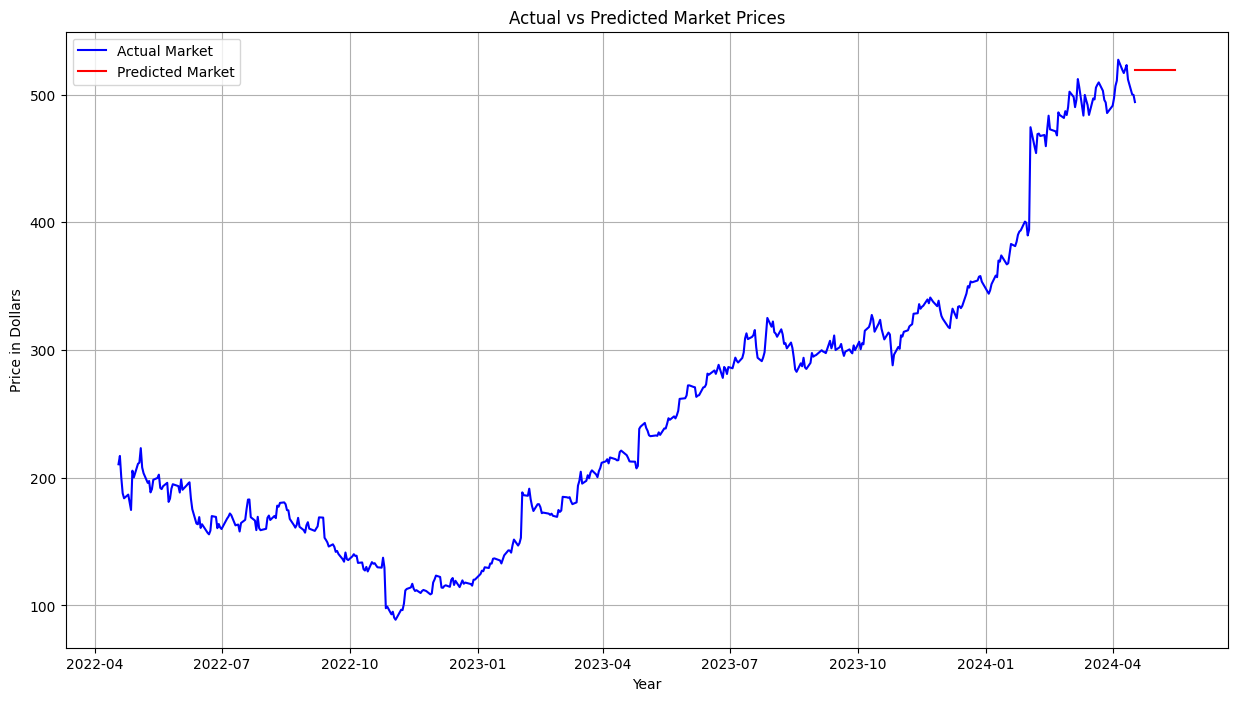

In [ ]:
# THIS STARTS THE RED LINE HIGH UP

# Create a range of future dates
future_dates = pd.date_range(start=meta_df['Date'].max(), periods=30, freq='D')

# Predict market values for the future dates using the linear regression model
future_X = pd.DataFrame({'50_SMA': [meta_df['50_SMA'].iloc[-1]] * len(future_dates)})
future_predictions = lr.predict(future_X)

# Plot the existing data along with the extended line
plt.figure(figsize=(15, 8))
plt.plot(meta_df['Date'], meta_df['Adj Close'], label='Actual Market', color='blue')
plt.plot(future_dates, future_predictions, label='Predicted Market', color='red')
plt.xlabel('Year')
plt.ylabel('Price in Dollars')
plt.title('Actual vs Predicted Market Prices')
plt.legend()
plt.grid(True)
plt.show()

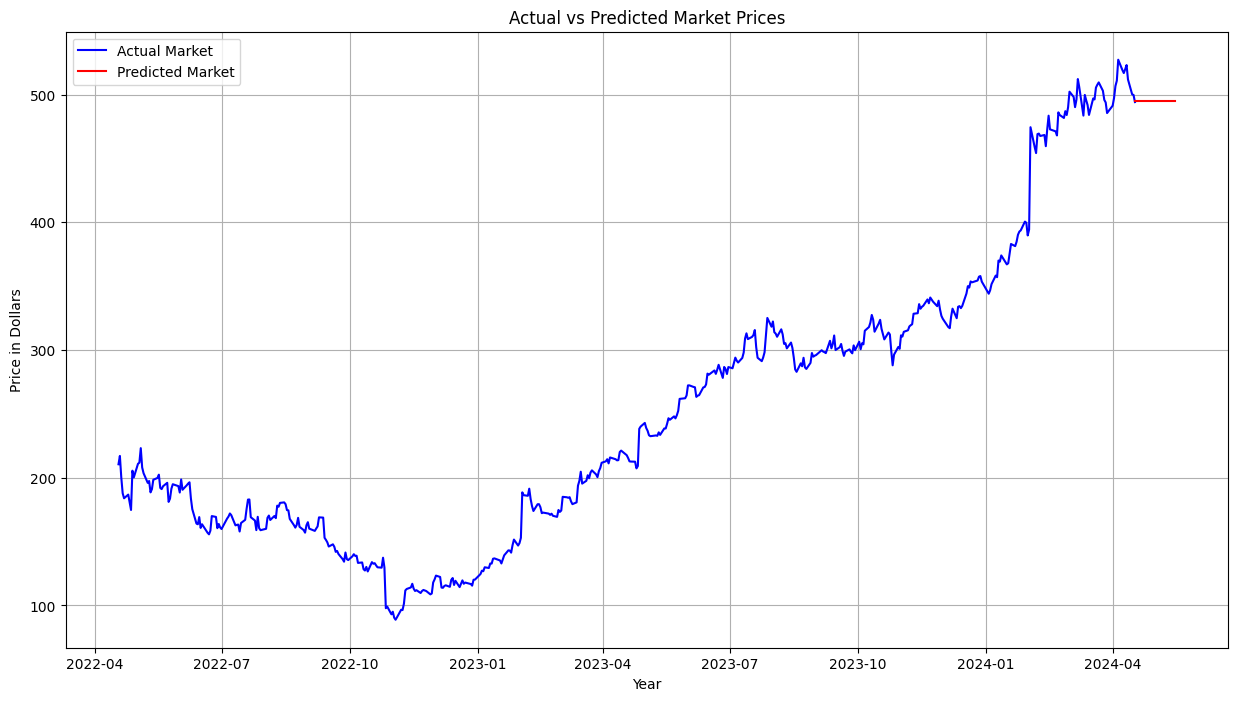

In [ ]:
# THIS STARTS THE RED LINE WHERE BLUE ENDS

# Include lagged values of the target variable as features
lagged_df = meta_df.copy()
lagged_df['Adj Close Lag1'] = lagged_df['Adj Close'].shift(1)
lagged_df.dropna(inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lagged_df[['50_SMA', 'Adj Close Lag1']], lagged_df['Adj Close'], test_size=0.2, shuffle=False)

# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Create a range of future dates
future_dates = pd.date_range(start=meta_df['Date'].max(), periods=30, freq='D')

# Predict market values for the future dates using the linear regression model
future_X = pd.DataFrame({'50_SMA': [meta_df['50_SMA'].iloc[-1]] * len(future_dates),
                         'Adj Close Lag1': [meta_df['Adj Close'].iloc[-1]] * len(future_dates)})
future_predictions = lr.predict(future_X)

# Plot the existing data along with the extended line
plt.figure(figsize=(15, 8))
plt.plot(meta_df['Date'], meta_df['Adj Close'], label='Actual Market', color='blue')
plt.plot(future_dates, future_predictions, label='Predicted Market', color='red')
plt.xlabel('Year')
plt.ylabel('Price in Dollars')
plt.title('Actual vs Predicted Market Prices')
plt.legend()
plt.grid(True)
plt.show()


## Microsoft

In [ ]:
# import the closing price data of Microsoft stock for the period of 2 years -

msft_df = pd.read_csv('MSFT.csv')
msft_df.head()

# convert Date column to datetime
msft_df['Date'] = pd.to_datetime(msft_df['Date'], format = '%Y-%m-%d')
# sort by datetime
msft_df.sort_values(by='Date', inplace=True, ascending=True)

# Create 50 days simple moving average column
msft_df['50_SMA'] = msft_df['Close'].rolling(window = 50, min_periods = 1).mean()
msft_df.dropna()
msft_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'MSFT.csv'

In [ ]:
# visualize data

# Calculate the number of quarters in the data range
num_quarters = (msft_df['Date'].dt.year.max() - msft_df['Date'].dt.year.min() + 1) * 4

msft_df['Adj Close'].plot(figsize = (15, 8), fontsize = 12)
plt.grid()
plt.ylabel('Price in Dollars')
plt.xlabel('Year')
plt.title('Microsoft')

# Customize x-axis ticks
plt.xticks(np.linspace(0, len(msft_df) - 1, num=num_quarters), [f'Q{q} {y}' for y in range(msft_df['Date'].dt.year.min(), msft_df['Date'].dt.year.max() + 1) for q in range(1, 5)])

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(msft_df[['50_SMA']], msft_df[['Adj Close']], test_size=.2, shuffle=False)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Model Coefficients:", lr.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error (MAPE):", np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

plt.figure(figsize = (20, 10))
msft_df['50_SMA'].plot(color = 'g', lw = 1)
plt.plot(y_test.index, y_pred, color = 'b', lw = 1)
msft_df['Adj Close'].plot(figsize = (15, 8), fontsize = 12)

# Customize x-axis ticks
plt.xticks(np.linspace(0, len(msft_df) - 1, num=num_quarters), [f'Q{q} {y}' for y in range(msft_df['Date'].dt.year.min(), msft_df['Date'].dt.year.max() + 1) for q in range(1, 5)])
plt.title('Microsoft')
plt.grid()
plt.show()

## NVidia

In [ ]:
# import the closing price data of NVidia stock for the period of 2 years -

nvda_df = pd.read_csv('NVDA.csv')
nvda_df.head()

# convert Date column to datetime
nvda_df['Date'] = pd.to_datetime(nvda_df['Date'], format = '%Y-%m-%d')
# sort by datetime
nvda_df.sort_values(by='Date', inplace=True, ascending=True)

# Create 50 days simple moving average column
nvda_df['50_SMA'] = nvda_df['Close'].rolling(window = 50, min_periods = 1).mean()
nvda_df.dropna()
nvda_df.head()

In [ ]:
# visualize data

# Calculate the number of quarters in the data range
num_quarters = (nvda_df['Date'].dt.year.max() - nvda_df['Date'].dt.year.min() + 1) * 4

nvda_df['Adj Close'].plot(figsize = (15, 8), fontsize = 12)
plt.grid()
plt.ylabel('Price in Dollars')
plt.xlabel('Year')
plt.title('NVidia')
# Customize x-axis ticks
plt.xticks(np.linspace(0, len(nvda_df) - 1, num=num_quarters), [f'Q{q} {y}' for y in range(nvda_df['Date'].dt.year.min(), nvda_df['Date'].dt.year.max() + 1) for q in range(1, 5)])

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(nvda_df[['50_SMA']], nvda_df[['Adj Close']], test_size=.2, shuffle=False)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Model Coefficients:", lr.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error (MAPE):", np.mean(np.abs((y_test - y_pred) / y_test)) * 100)


plt.figure(figsize = (20, 10))
nvda_df['50_SMA'].plot(color = 'g', lw = 1)
plt.plot(y_test.index, y_pred, color = 'b', lw = 1)
nvda_df['Adj Close'].plot(figsize = (15, 8), fontsize = 12)

# Customize x-axis ticks
plt.xticks(np.linspace(0, len(nvda_df) - 1, num=num_quarters), [f'Q{q} {y}' for y in range(nvda_df['Date'].dt.year.min(), nvda_df['Date'].dt.year.max() + 1) for q in range(1, 5)])
plt.title('NVidia')
plt.grid()
plt.show()